# Configuration du notebook

In [1]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from wordcloud import WordCloud

# Image processing library
from PIL import Image

# Text processing libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Utils
import sys
import os

# Get path to project root (assuming notebook is in notebooks/)
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
SCRIPTS_DIR = os.path.join(PROJECT_ROOT, "scripts")

# Add to sys.path
if SCRIPTS_DIR not in sys.path:
    sys.path.append(SCRIPTS_DIR)
from utils import image_path, display_image, display_image_df, display_image_from_row, load_data, data_info

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cramarokoto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Chargement des données
X_train, y_train, X_test = load_data()

# Exploration des données

Les premières choses à comprendre concernant les données :

- X_train contient toutes les données que nous avons pour l'entraînement ET les tests : elles sont associées aux valeurs de y_train.
- X_test contient uniquement les données à classifier avec notre modèle afin d’être évalué dans le cadre du challenge Rakuten.
- Il en va de même pour les images.

## Description de X_train

In [3]:
data_info(X_train)

#### Nan values in X_train ####

print("NaN values in X_train")
X_train_nan = X_train.isna().sum()
print(X_train_nan)
print("\n")

print("Nan values ratio in X_train", X_train_nan / len(X_train))

#### Unique values in train variables ####

print("Unique value numbers in train variables :", end = "\n\n")
print(X_train.nunique(), end = "\n\n")

# Less unique values in Designation than productid and imageid -> Duplicates with different id ?

#### Duplicated values in train variables ####

print("# of duplicates in designation :", round(X_train.duplicated(subset = ["designation"]).sum()/len(X_train["designation"])*100, 2), "%")
print("# of duplicates in productid :", X_train.duplicated(subset = ["productid"]).sum())
print("# of duplicates in imageid :", X_train.duplicated(subset = ["imageid"]).sum())

# Duplicates of products with different productid and imageid

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB




designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  
0                                                NaN  3804725264  1263597046  
1                                                NaN   436067568  1008141237  
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978  
3                                                NaN    50418756   457047496  
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786



NaN values in X_train
designation        0
description    29800
productid          0
imageid            0
dtype: int64


Nan values ratio in X_train designation    0.000000
description    0.350935
productid      0.000000
imageid        0.000000
dtype: float64
Unique value numbers in train variables :

designation    82265
description    47506
productid      84916
imageid        84916
dtype: int64

# of duplicates in designation : 3.12 %
# of duplicates in productid : 0
# of duplicates in imageid : 0


Conformément à la description des données, seule la description est optionnelle, on remarque que le jeu de données est complet et que c'est la seule variable avec des valeurs nulles.

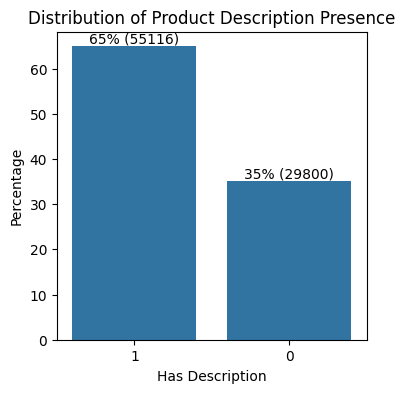

In [4]:
# Dichotomisation de la présence de description dans X_train
X_train['has_description'] = X_train['description'].notna().astype(int)

abs_values = X_train['has_description'].value_counts(ascending=False)
rel_values = X_train['has_description'].value_counts(ascending=False, normalize=True).values * 100
labels = [f'{p[1]:.0f}% ({p[0]})' for p in zip(abs_values, rel_values)]

# Affichage de la distribution de has_description
plt.figure(figsize=(4, 4))
ax = sns.countplot(data=X_train, x='has_description', order=X_train['has_description'].value_counts().index, stat='percent')
ax.bar_label(container=ax.containers[0], labels=labels)

plt.title('Distribution of Product Description Presence')
plt.xlabel('Has Description')
plt.ylabel('Percentage')
plt.show()

Il y a plus de produits avec une description (65 %) que de produits sans description (35%) malgré le caractère optionnel de la description. On peut supposer que cela est dû à l'importance de la description de l'article pour favoriser sa vente en plus de sa catégorisation. En effet, la description fournit d'autres éléments discriminant pour un produit dans le cadre de la recherche via un moteur parmi de nombreux produits.

## Description de y_train

In [5]:
data_info(y_train)

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   prdtypecode  84916 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB




prdtypecode
0           10
1         2280
2           50
3         1280
4         2705

In [6]:
# Nombre de valeurs uniques dans y_train
print("Unique values in y_train")
display(y_train.value_counts())

print("\n")
print("Count of unique values :", y_train.nunique())

Unique values in y_train


prdtypecode
2583           10209
1560            5073
1300            5045
2060            4993
2522            4989
1280            4870
2403            4774
2280            4760
1920            4303
1160            3953
1320            3241
10              3116
2705            2761
1140            2671
2582            2589
40              2508
2585            2496
1302            2491
1281            2070
50              1681
2462            1421
2905             872
60               832
2220             824
1301             807
1940             803
1180             764
Name: count, dtype: int64



Count of unique values : prdtypecode    27
dtype: int64


Il existe 27 classes de produits distinctes dans le jeu de données d'apprentissage.
Malgré une recherche de la taxonomie exacte des produits rakuten, nous n'avons pas réussi à avoir accès aux labels exacts des classes de produits. Pour faciliter la compréhension des données, nous avons décidé de les nommer nous même suite à l'exploration des données pour chaque catégorie. Nous ajoutons donc cette variable à y_train.

In [7]:
labels = pd.read_csv("./../data/prdtypecode_labels.csv", index_col=0)
display(labels)

y_train = y_train.merge(labels, on="prdtypecode", how="left")
display(y_train)

prdtypecode_label
prdtypecode                                                   
10                                                      livres
40                                                  jeux video
50                                       accesoires jeux video
60                                      consoles de jeux video
1140                           produits derivés de jeux vidéos
1160                                    cartes collectionables
1180            figurines collectionnables pour jeu de société
1280                                 jouets, peluches, poupées
1281                                           jeux de société
1300                          voitures miniatures et maquettes
1301              accesoires et jeux pour petits enfants/bébés
1302                                          jeux d'exterieur
1320                                accessoires petite enfance
1560                      mobilier de rangement pour la maison
1920                                           linge de maison
1940                                                nourriture
2060                      accesoires de décoration pour maison
2220                     accessoires pour animaux de compagnie
2280                                                 magazines
2403                                             livres et bds
2462          consoles de jeux vidéo et jeux vidéos d'occasion
2522                 produits de papeterie et rangement bureau
2582                       mobilier d'extérieur et accessoires
2583                                    accessoires de piscine
2585         outillage et accessoires pour travaux ou jardi...
2705                                                    livres
2905                                    jeux en téléchargement

prdtypecode                          prdtypecode_label
0               10                                     livres
1             2280                                  magazines
2               50                      accesoires jeux video
3             1280                  jouets, peluches, poupées
4             2705                                     livres
...            ...                                        ...
84911           40                                 jeux video
84912         2583                     accessoires de piscine
84913         2280                                  magazines
84914         1560       mobilier de rangement pour la maison
84915         2522  produits de papeterie et rangement bureau

[84916 rows x 2 columns]

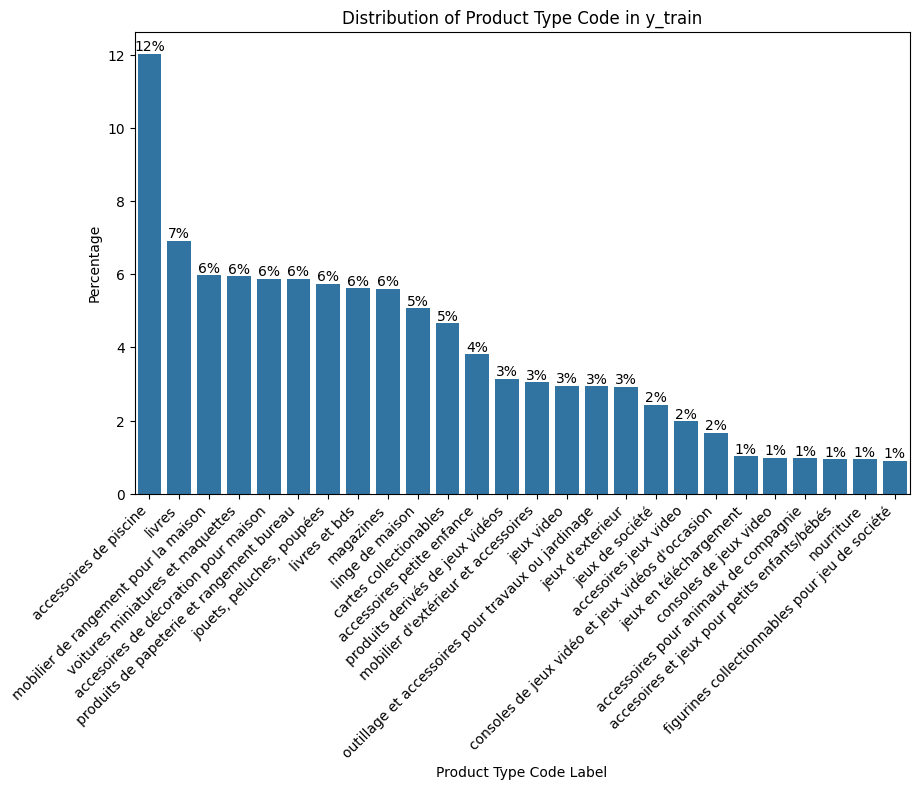

In [8]:
abs_values = y_train['prdtypecode_label'].value_counts(ascending=False)
rel_values = y_train['prdtypecode_label'].value_counts(ascending=False, normalize=True).values * 100
labels = [f'{p[1]:.0f}%' for p in zip(abs_values, rel_values)]

# Histogramme de la distribution des codes de type de produit dans y_train
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=y_train, x='prdtypecode_label', order=y_train['prdtypecode_label'].value_counts().index, stat='percent')
ax.bar_label(container=ax.containers[0], labels=labels)

plt.title('Distribution of Product Type Code in y_train')
plt.xlabel('Product Type Code Label')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

Le jeu de données n'est pas équilibré :
- la classe 2583 (accessoires de piscine) est plus représentée que les autres avec 12% du jeu de données
- les classes 1560 (mobilier de rangement pour la maison), 1300 (voitures miniatures et maquettes), 2060 (accesoires de décoration pour maison), 2522 (produits de papeterie et rangement bureau), 1280 (jouets, peluches, poupées), 2403 (livres et bds), 2280 (magazines) suivent ensuite avec 6% chacune seulement
- les classes les moins représentées 2905 (jeux en téléchargement), 60 (consoles de jeux video), 2220 (accessoires pour animaux de compagnie), 1301 (accesoires et jeux pour petits enfants/bébés), 1940 (nourriture), 1180 (figurines collectionnables pour jeu de société) représentent quant à elles 1% chacune

## Analyse des variables disponibles

### Analyse croisée entre la présence de 'description' du produit et la catégorie du produit


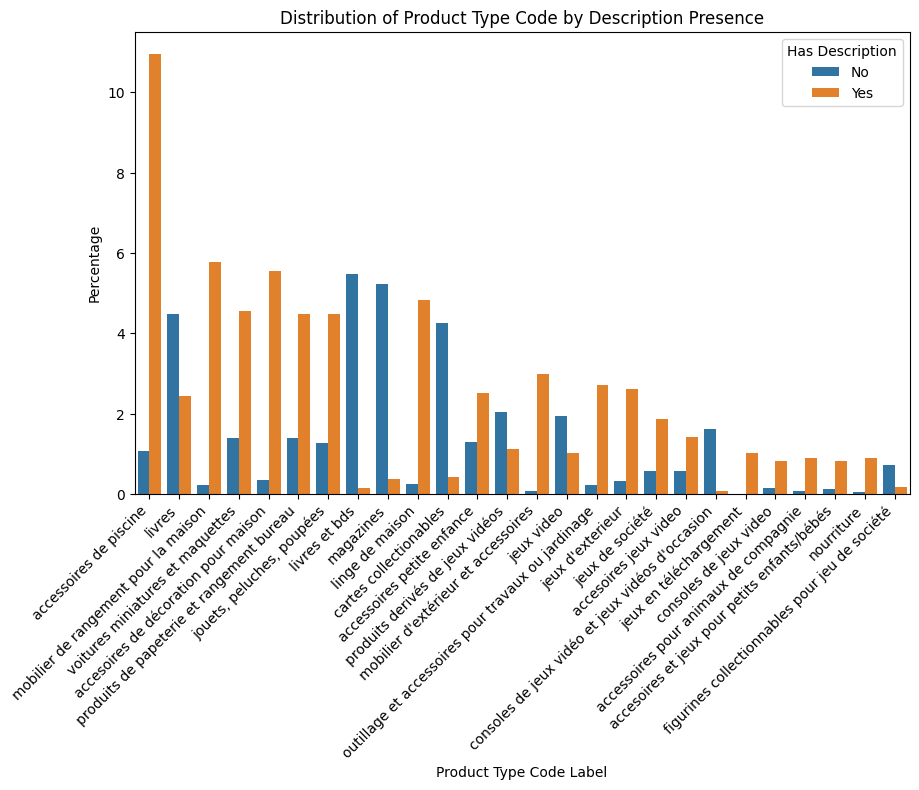

In [9]:
# Affichage de la distribution des codes de type de produit en fonction de la présence de description
plt.figure(figsize=(10, 6))
sns.countplot(data=y_train, x='prdtypecode_label', hue=X_train['has_description'], order=y_train['prdtypecode_label'].value_counts().index, stat='percent')
plt.title('Distribution of Product Type Code by Description Presence')
plt.xlabel('Product Type Code Label')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Has Description', loc='upper right', labels=['No', 'Yes'])
plt.show()

La répartition de produits avec ou sans description n'est pas homogène entre les catégories de produit par rapport au ratio moyen du jeu de données (65% avec et 35% sans description).
Certains produits comme 2403 contiennent majoritairement des produits non décrits alors que d'autres comme 1560 contiennent majoritairement des produits décrits.

### Analyse de la longueur de la variable 'designation'


Text(0.5, 0, 'Designation Length')

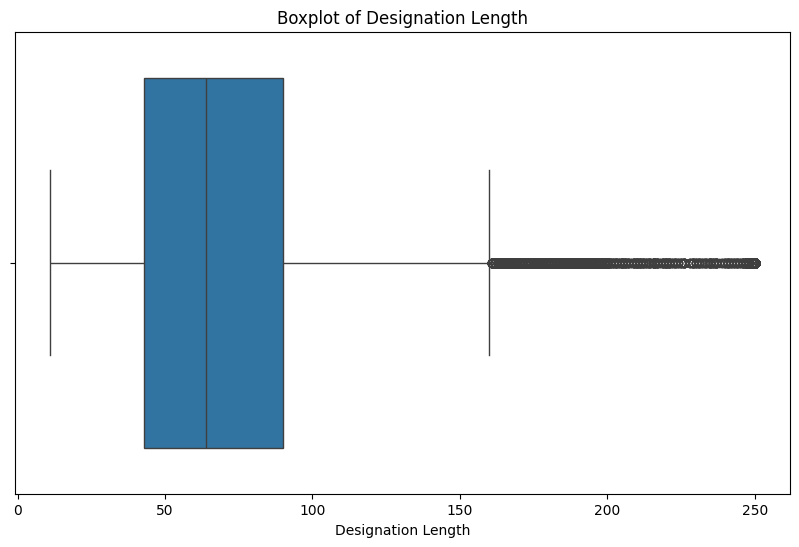

In [10]:
X_train['designation_length'] = X_train['designation'].str.len()

# Boxplot de la longueur de la variable 'designation'
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='designation_length')

plt.title('Boxplot of Designation Length')
plt.xlabel('Designation Length')

In [11]:
X_train['designation_length'].describe()

count    84916.000000
mean        70.163303
std         36.793383
min         11.000000
25%         43.000000
50%         64.000000
75%         90.000000
max        250.000000
Name: designation_length, dtype: float64

On observe que la longueur de designation est très variable avec un min de 11 caractères et un max de 250 caractères.
Sa longueur moyenne est de 70 caractères et la médiane se situe à 64 caractères.
D'après le boxplot, il existe beaucoup d'outliers au dela de 160 caractères.

### Analyse croisée de la catégorie et de la longueur de la 'designation'

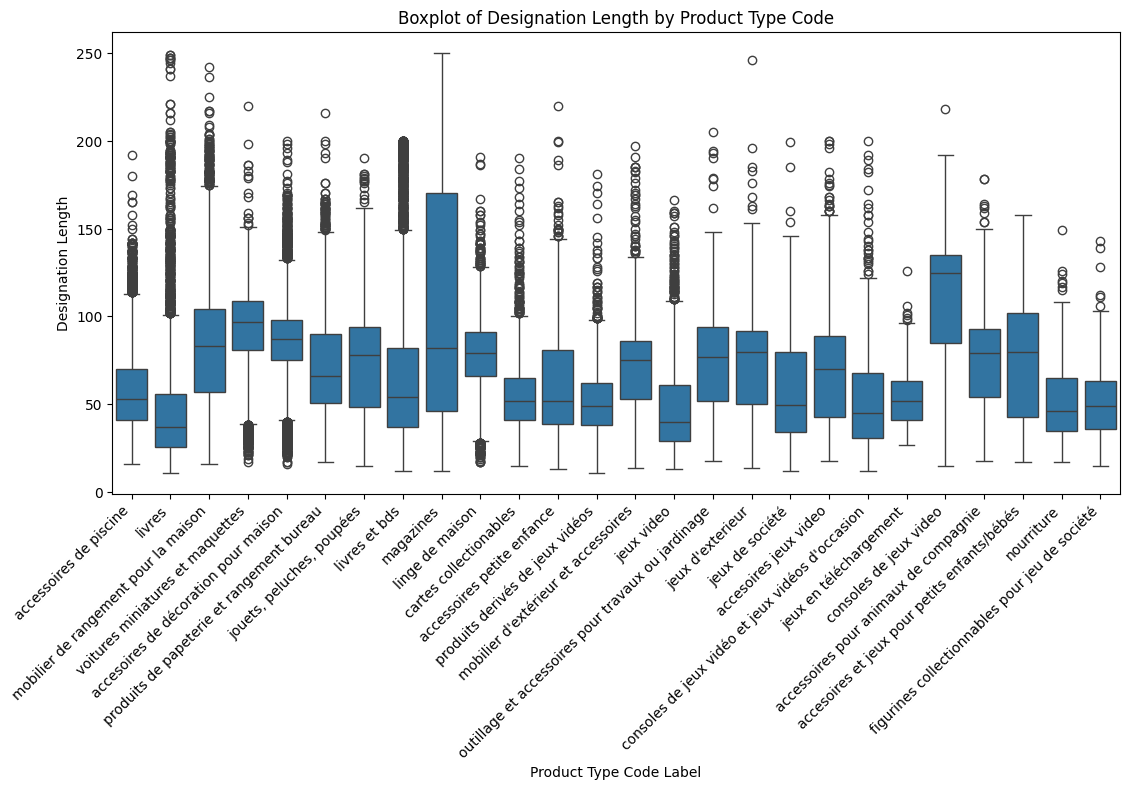

In [12]:
# Boxplot de la longueur de la variable 'designation' par catégorie de produit
plt.figure(figsize=(13, 6))
sns.boxplot(x=y_train['prdtypecode_label'], y=X_train['designation_length'], order=y_train['prdtypecode_label'].value_counts().index)
plt.title('Boxplot of Designation Length by Product Type Code')
plt.xlabel('Product Type Code Label')
plt.ylabel('Designation Length')
plt.xticks(rotation=45, ha='right')
plt.show()

La distribution de la longueur de Designation par catégorie de produit n'est pas homogène.

### Analyse des duplicats de 'designation'

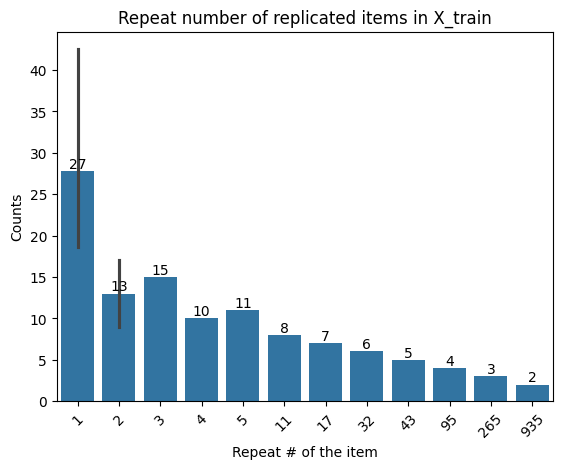

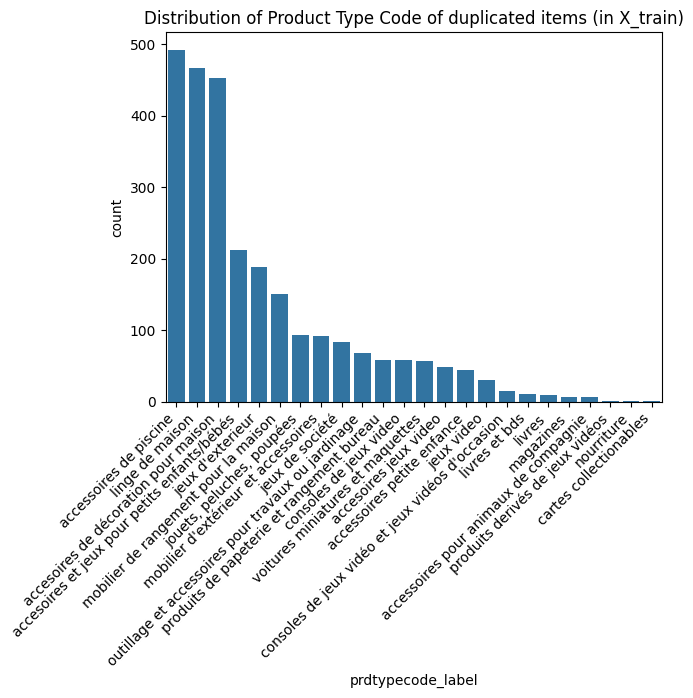

In [13]:
#### Duplicated values frequencies

counts = X_train["designation"].value_counts().reset_index()
counts.columns = ["designation", "repeat"]

repeats = counts['repeat'].value_counts().sort_index().reset_index()
repeats.columns = ['repeat', 'count']

repeats = repeats.iloc[1:]

ax = sns.barplot(data = repeats, x = 'count', y = 'repeat')
ax.bar_label(container = ax.containers[0],  fmt='%d')
plt.xticks(rotation = 45)
plt.xlabel("Repeat # of the item")
plt.ylabel("Counts")
plt.title("Repeat number of replicated items in X_train")
plt.show()


#### Duplicated values' categories

y_duplicated = y_train[X_train.duplicated(subset = ["designation"]) == True]

sns.countplot(data = y_duplicated, x = 'prdtypecode_label', order = y_duplicated['prdtypecode_label'].value_counts().index)
plt.xticks(rotation = 45, ha='right')
plt.title("Distribution of Product Type Code of duplicated items (in X_train)")
plt.show()

On observe de récurrents lignes de 'Designation' avec des fréquences qui varient de 2 à 76 instances: 935 articles se répètent 2 fois, 1 article 76 fois
On observe ces répétitions de Designation dans des catégories différentes

### Analyse de la longueur de la variable 'description'


Text(0.5, 0, 'Description Length')

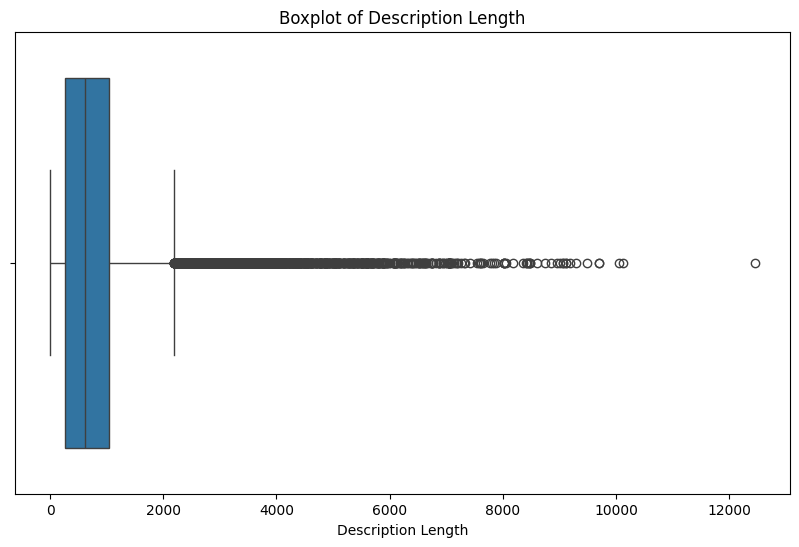

In [14]:
X_train['description_length'] = X_train['description'].str.len()

# Boxplot de la longueur de la variable 'descpription'
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='description_length')

plt.title('Boxplot of Description Length')
plt.xlabel('Description Length')

In [15]:
X_train['description_length'].describe()

count    55116.000000
mean       808.171692
std        805.462153
min          1.000000
25%        259.000000
50%        626.000000
75%       1034.000000
max      12451.000000
Name: description_length, dtype: float64

On observe que la longueur de description est très variable avec un min de 1 caractères et un max de 12451 caractères.
Sa longueur moyenne est de 808 caractères et la médiane se situe à 626 caractères.
D'après le boxplot, il existe beaucoup d'outliers au dela de 2000 caractères.

### Analyse de la 'description' par catégorie de produit

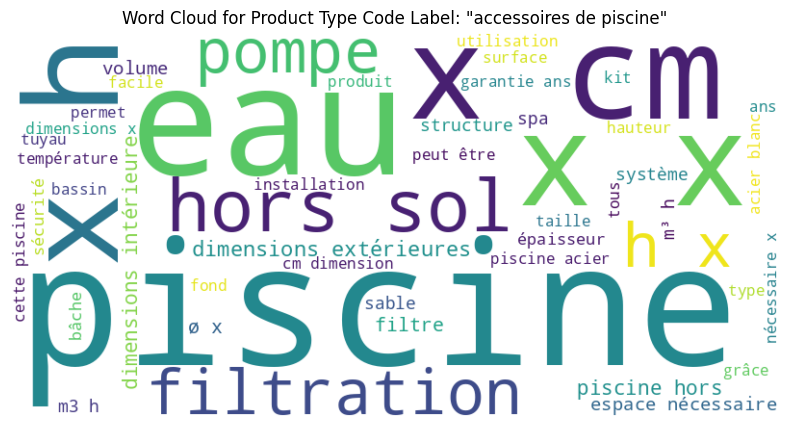

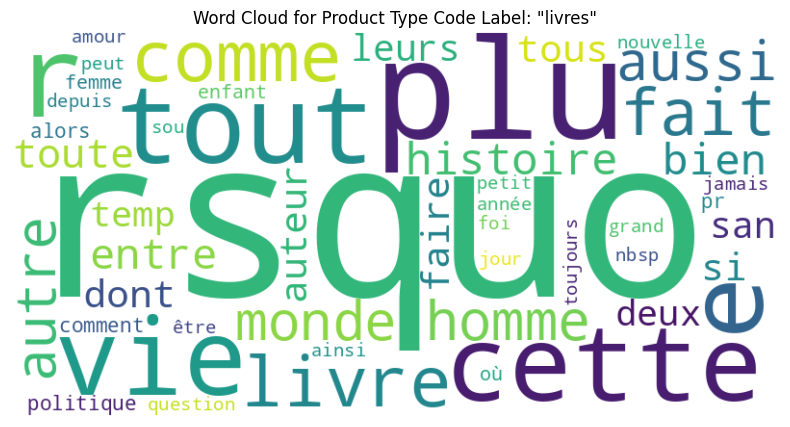

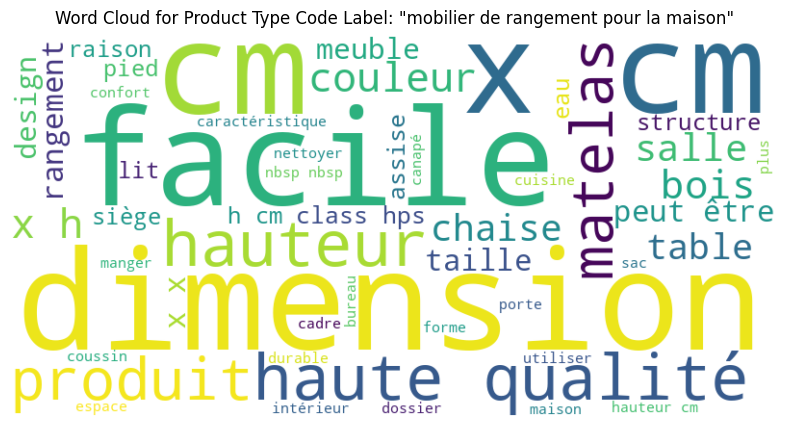

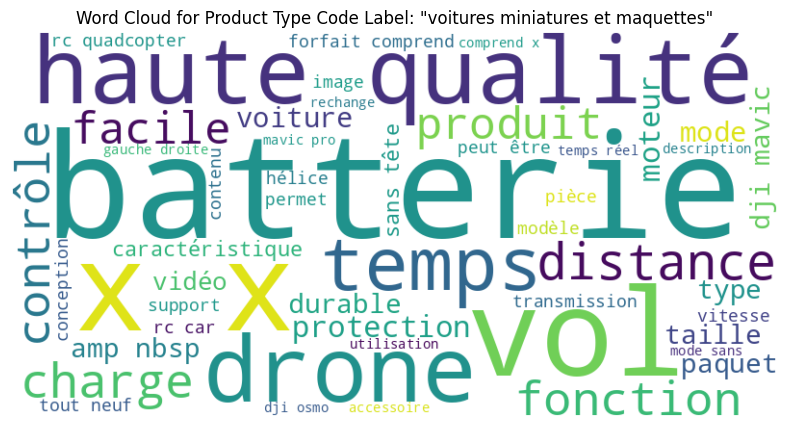

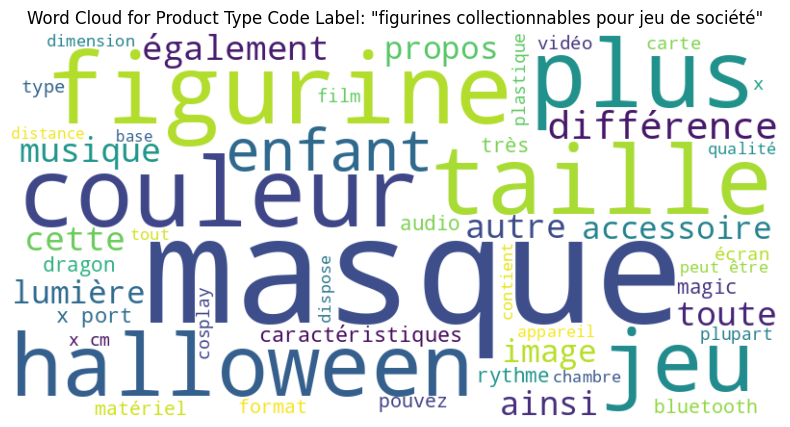

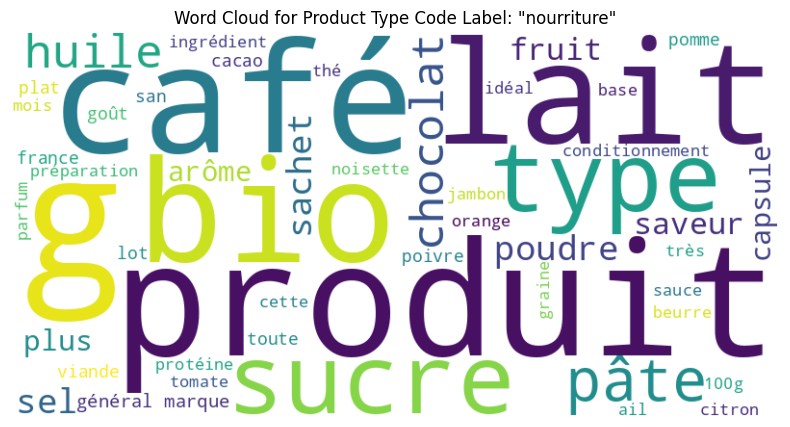

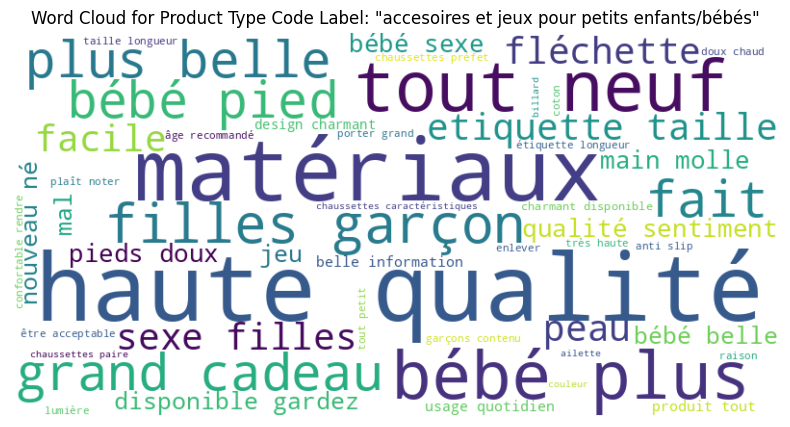

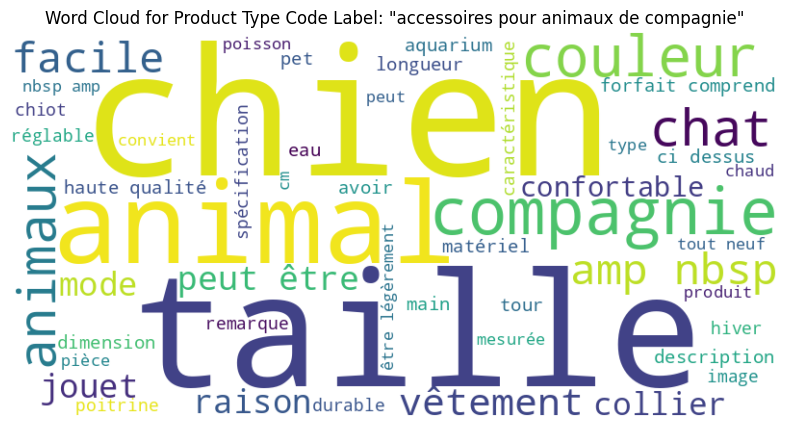

In [16]:
html_stopwords = ['br', 'p', 'div', 'span', 'b', 'i', 'li', 'ul', 'strong', 'em', 'eacute', 'agrave']
final_stopwords = stopwords.words('english') + stopwords.words('french') + html_stopwords

# Récupération des 4 catégories de produits avec le plus et le moins de descriptions pour comparaison
most_descriptions = y_train['prdtypecode_label'].value_counts().nlargest(4).index.tolist()
least_descriptions = y_train['prdtypecode_label'].value_counts().nsmallest(4).index.tolist()

# Concaténation de toutes les descriptions de chaque product label pour la création du nuage de mots
for label in most_descriptions + least_descriptions:
    text = ' '.join(X_train.loc[y_train['prdtypecode_label'] == label, 'description'].dropna().tolist())

    # Nettoyage du texte (apostrophes, ponctuation, etc.)
    text = re.sub(r'[^\w\s]', ' ', text.lower())
    
    # Création du nuage de mots
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50, stopwords = final_stopwords).generate(text)
    
    # Affichage du nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Product Type Code Label: "{label}"')
    plt.show()

Les 4 worclouds des catégories de produits avec le plus de descriptions et les 4 wordclouds de celles avec le moins de descriptions mettent clairement en avant certains termes plus que d'autres.

Cela nous permet d'identifier la catégorie de produit d'une manière sémantique à la lecture des termes mis en exergue : on pourra étudier cette intuition en faisant du deep learning ou encore du NLP pour classifier les catégories.

Sachant que nous avons principalement des données non structurées pour la classification (du texte parfois optionnel et des images), cette approche semble la plus efficace.

## Analyse des images

### Affichage des images

Quelques exemples d'images avec les fonctions utiles vues précédemment.

Image dimensions: 500x500 pixels


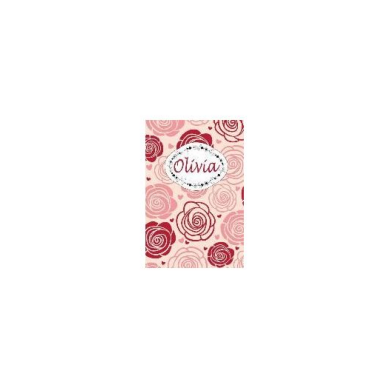

In [17]:
display_image_df(1263597046, 3804725264, "train", print_dim=True)

Image dimensions: 500x500 pixels


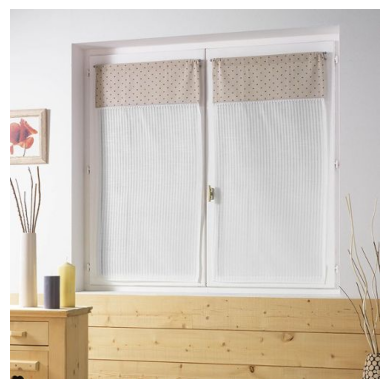

In [18]:
display_image_df(X_train.loc[13, "imageid"], X_train.loc[13, "productid"], "train", print_dim=True)

Image dimensions: 500x500 pixels


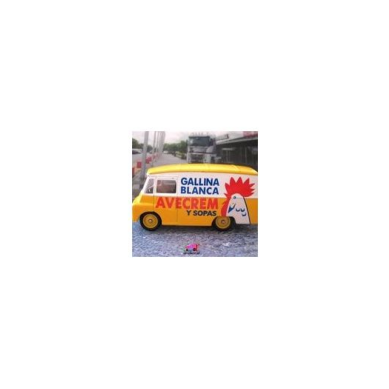

In [19]:
display_image_from_row(15, "test", is_index=False, print_dim=True)

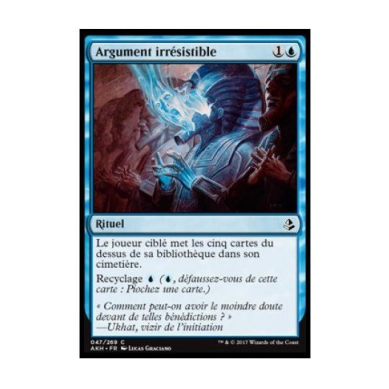

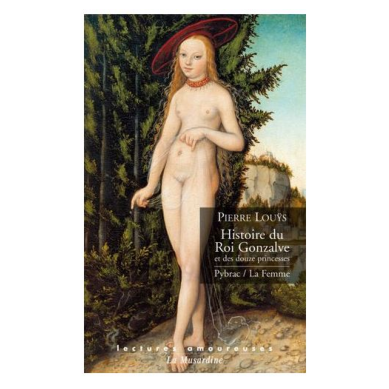

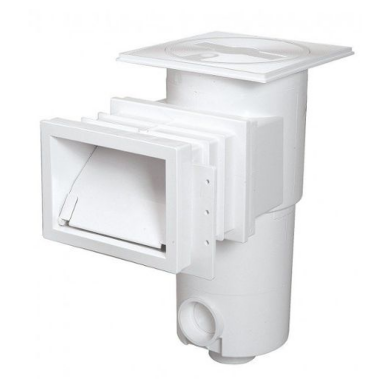

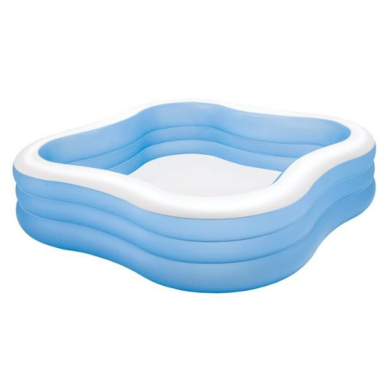

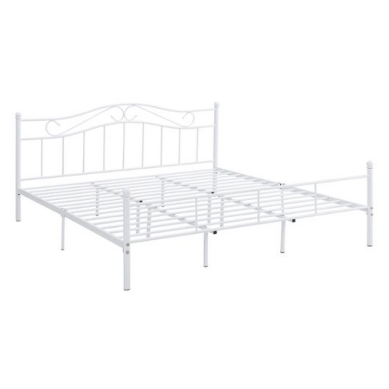

In [20]:
### Random images read with Matplotlib ###
for i in np.random.choice(np.arange(0, len(X_train)), size=5):
    display_image_from_row(i, "train", is_index=False)

On remarque que toutes les images semblent être de la même dimension 500x500 pixels et en couleur. Cependant leurs dimensions utiles sont différentes: la différence est comblée par des bords blancs.

Dans un premier temps, nous vérifierons l'unicité du format des images, puis nous nous intéresserons aux dimensions utiles.

### Affichage de l'image et de la description d'un produit par classe

Product type code: 10
Product type label: "livres"
Designation: Children's Magazine N°42 : The Spindle The Shuttle And The Needle - The Scottish Clan - From Yrok To The Tweed -
Description: Revue mensuelle pour apprendre à lire l'anglais couramment.
Image dimensions: 500x500 pixels


/tmp/ipykernel_152098/1936825019.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random_indices = y_train.groupby('prdtypecode').apply(lambda x: x.sample(1)).index.get_level_values(1).tolist()


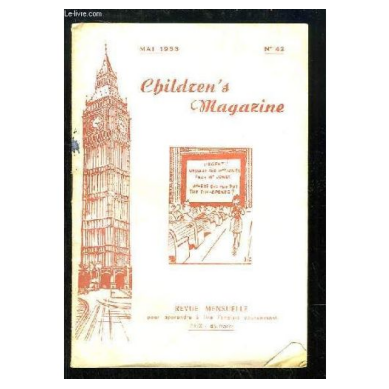

Product type code: 40
Product type label: "jeux video"
Designation: Hostel - Umd Video
Description: Deux etudiants américains Paxton et Josh ont décidé de découvrir l'Europe avec un maximum d'aventure et de sensations fortes. Avec Oli un islandais qu'ils ont rencontré en chemin ils se retrouvent à Prague dans ce qu'on leur a décrit comme le nirvana des vacances de débauche. Ce voyage-là va les conduire au bout de l'horreur...
Image dimensions: 500x500 pixels


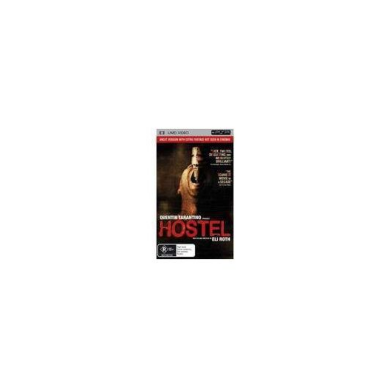

Product type code: 50
Product type label: "accesoires jeux video"
Designation: Cle Usb 16 Gb Cle Usb 3.0 Cle Usb Cle Usb Noir
Description: Description:  <br />Type d&#39;element: cle USB <br />Interface USB 3.0 <br />Excellente cle USB en excellent etat <br />a propos de la capacite: <br />8 Go &#61; environ 72 a 76 Go <br />16 Go &#61; environ 144 Go a 148 Go <br />32 Go &#61; environ 285 a 30 Go <br />64 Go &#61; environ 585 Go a 60 Go <br />Les fournisseurs utilisent l&#39;arithmetique decimale de la memoire Flash: 1 Mo &#61; 1 000 Ko 1 Go &#61; 1 000 Mo <br />Systeme d&#39;exploitation calcule avec arithmetique binaire: 1 Mo &#61; 1024 Ko 1 Go &#61; 1024 Mo; <br />Il existe donc des differences entre la capacite d&#39;affichage et la capacite nominale des produits de memoire flash <br />L&#39;emballage inclus: <br />1 X cle USB <br />Remarque: <br />L&#39;ecart de couleurs peut differer en raison de parametres de moniteur differents. <br />
Image dimensions: 500x500 pixels


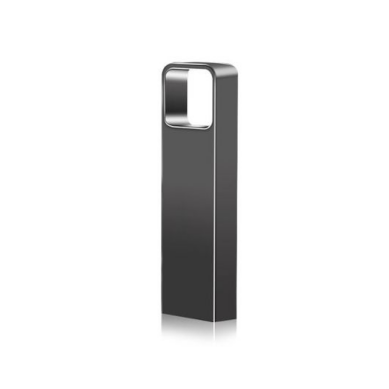

Product type code: 60
Product type label: "consoles de jeux video"
Designation: 2.5 \""Tft Affichage Lecteur De Jeu Portable Intégré 260 Classique Console De Jeu Vidéo
Description: Nom de la marque:OCDAY<br />Affichage de couleur:Oui<br />Taille de l&#39;écran:Other<br />Ecran tactile:Oui<br />Numéro du modèle:RS-8A<br />Paquet:Oui<br />Material:Plastic:Plastic<br />Color::Orange&#43;Black/Blue&#43;Black/Green&#43;Black (Optional)<br />Quantity::1 Set (other accessories demo in the picture is not included)
Image dimensions: 500x500 pixels


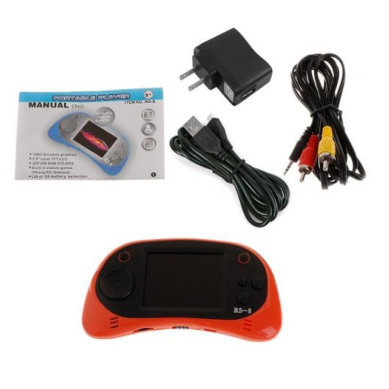

Product type code: 1140
Product type label: "produits derivés de jeux vidéos"
Designation: Porte-Cles - Winter Soldier - Metal
Description: nan
Image dimensions: 500x500 pixels


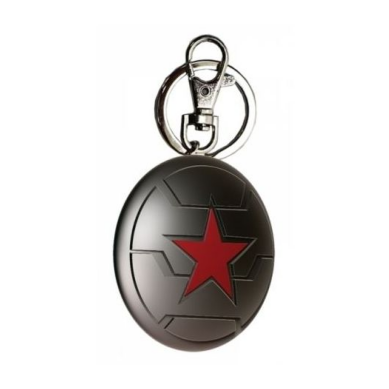

Product type code: 1160
Product type label: "cartes collectionables"
Designation: Marvel Masterpieces 1995 / Carte 125 Sur 151 / Emplate. Version Américaine
Description: nan
Image dimensions: 500x500 pixels


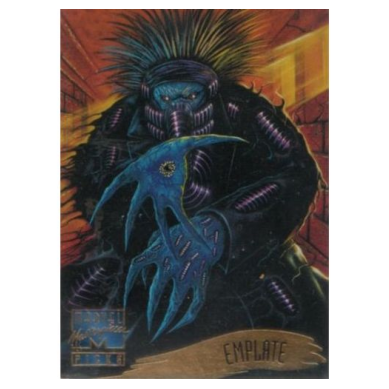

Product type code: 1180
Product type label: "figurines collectionnables pour jeu de société"
Designation: Heroclix- Accountable#009 (Superman &wonderwoman)
Description: nan
Image dimensions: 500x500 pixels


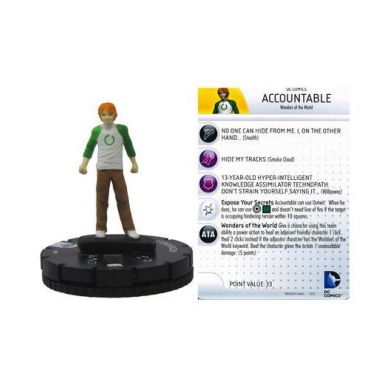

Product type code: 1280
Product type label: "jouets, peluches, poupées"
Designation: Combo Étanche 3660 3800kv Brushless Avec 80a Esc Pour 1 10 Rc Car Racing Drone 254 Weentyer123
Description: Combo étanche 3660 moteur 3800KV Brushless avec 80A ESC Pour 1 10 RC Car Racing Caractéristique principale: 4 Pole 12 Emplacement Salut couple de conception du moteur de haute qualité: CNC Usinées 6061 T6 billettes d&#39;aluminium Dissipateur peut de haute pureté cuivre liquidées Optimise efficacité régime élevé ABEC5 surdimensionné roulements en forme universelle pour 1h10 voiture RC 2S 3S course RC hors route voiture de précision rotor équilibré la douceur pour une meilleure fiabilité et le régime maximum stator - super mince (035 mm) Laminations Alimentation en eau la preuve et à la poussière pour tout- courses météorologiques; (Remarque: s&#39;il vous plaît désinstaller le ventilateur de refroidissement avant d&#39;utiliser ce CES dans l&#39;eau propre et sécher rapidement après l&#39;utilisa

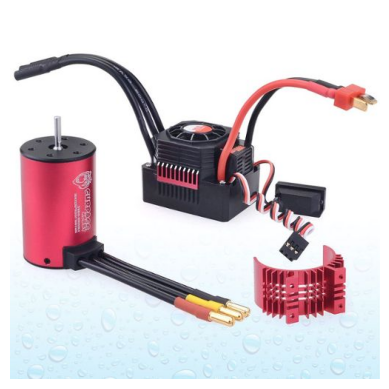

Product type code: 1281
Product type label: "jeux de société"
Designation: Belle Biscuits Boule En Mousse Nuage Slime Putty Parfumée Stress Enfants Clay Toy
Description: Belle balle en mousse Biscuits Nuage Slime Putty parfumée Stress Enfants Clay Toy Feature: Sûr et non toxique - Non Borax est utilisé dans cette boue incroyable de boue moelleux et super amusant de jouer avec! Grand soulagement du stress pour les adultes et les enfants appropriés pour les enfants âgés de plus de 8 Il est idéal pour les arts l&#39;artisanat et les projets scolaires Couleur: Multicolor Contenu de l&#39;emballage: 1 PC jouets en argile
Image dimensions: 500x500 pixels


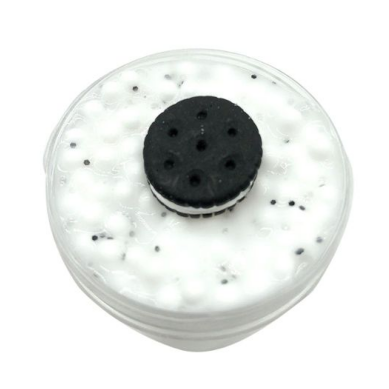

Product type code: 1300
Product type label: "voitures miniatures et maquettes"
Designation: Solido Cadillac 452 A-Solido
Description: nan
Image dimensions: 500x500 pixels


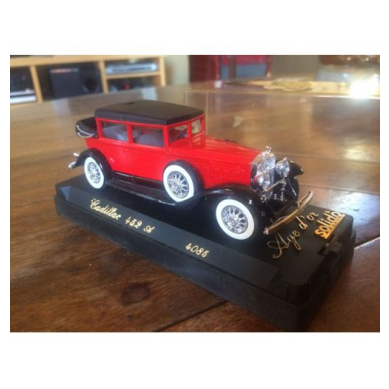

Product type code: 1301
Product type label: "accesoires et jeux pour petits enfants/bébés"
Designation: Fox bébé anti-dérapant chaussettes de coton Blend Chaussettes souples de sol pour enfants-Auucne
Description: Bébé Fox chaussettes en coton pour enfants anti-dérapants Blend Chaussettes souple sol Feature: 100% qualité de la marque nouvelle et haute. Quantité: 1 paire Couleur: Gris Matériel: Coton Style: Sexe Casual: unisexe Bon pour votre nouveau-né. Faites votre bébé plus belle Nous croyons que vous allez l&#39;adorer beaucoup Le forfait comprend: 1 paire chaussettes de bébé avec l&#39;emballage de vente au détail
Image dimensions: 500x500 pixels


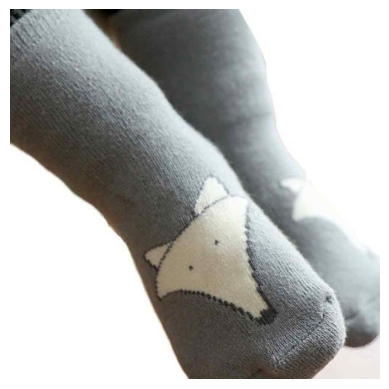

Product type code: 1302
Product type label: "jeux d'exterieur"
Designation: 3 Led Lampe Frontale Rechargeable Phare Xml T6 Tête De La Torche Lampe De Lumière Goverie
Description: 3 LED Lampe frontale rechargeable phare XML T6 tête de la torche lumière lampDescription: 100% tout neuf et de haute qualityType: HeadlightMain Couleur: BlackBattery Type: 2 * 18650 batterie (non inclus) Lightbulb Type: LEDTorch Type: LED3-Modes: Haut / Bas / StrobeMaterial: alliage d&#39;aluminium SwitchType: ButtonLED Couleur: WhiteNumber de LED: 1Featues: 100% nouvelle marque et une durée de vie élevée qualityWith jusqu&#39;à 100000 heures. Réglable gamme de headband.The du projecteur est d&#39;environ 500 à 600 meters.High brightnesslong lifespanenergy-saving.Easy installer une taille compacte pour le câblage eary carrying.Internal applique la tension de fonctionnement du circuit de rappel à haute efficacité est large et peut utiliser les piles dans le plus grand Le degré. Base réglable est prévu pour chaq

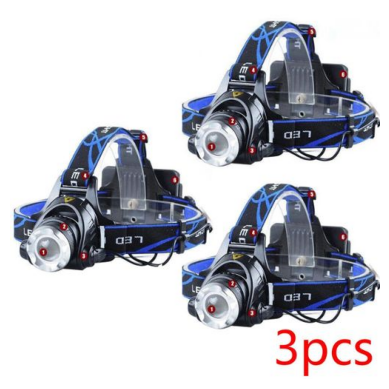

Product type code: 1320
Product type label: "accessoires petite enfance"
Designation: Premières Tasses Babycup - Lot De 4 - Bleu
Description: <p>  <strong>Babycup : la 1ère tasse pour bébés et bambins fabriquée en Angleterre !</strong><br />  <br />  La mini tasse ouverte Babycup a été conçu pour sevrer et apprendre à boire aux bébés et aux bambins. Elle peut être également utilisée pour nourrir les nouveaux-nés y compris les bébés prématurés (veuillez demander conseil à votre professionnel de santé).<br />  <br />  La Babycup encourage l&#39;enfant à siroter et aide :<br />  - au développement des habilités de la motricité fine.<br />  - à maintenir la santé buccale en initiant la bonne utilisation de la langue et du palais.<br />  La Fondation Anglaise de la santé bucco dentaire préconise de boire dans un verre ou une coupelle dès le premier âge.<br />  L&#39;apprentissage doit se faire dès l&#39;âge de 6 mois.<br />  De nos jours 30% des enfants présentent des problèmes dentaires. B

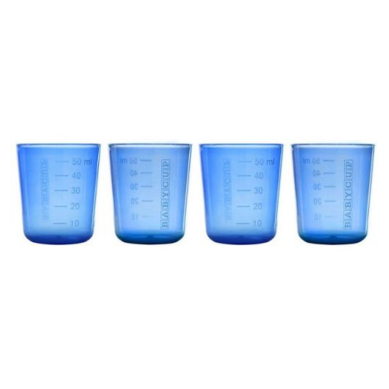

Product type code: 1560
Product type label: "mobilier de rangement pour la maison"
Designation: 1pc 5 Cintree Multifonction Écharpe Trou Rond Vêtements Support De Ceinture Nouée Rangement
Description: 1pc multifonction écharpe cintre 5 trou rond vêtements ceinture nouée Support de rangement Nous ne proposons pas le choix de la couleur et le style nous vous ferons parvenir le produit au hasard espérons que vous pouvez comprendre Fonction: Condition: 100% tout neuf et de haute qualité. Couleur: Au hasard. Matériel: PP de haute qualité Taille: 32x15cm. Fonction de ce produit: vêtements de stockage multi-fonctionnels des serviettes cravates ceintures et ainsi de suite. Le forfait comprend: 1 Pc stockage Rack Avis: S&#39;il vous plaît permettre erreur 1-3mm en raison de la mesure manuelle et assurez-vous que vous ne me dérange pas avant de commander. Il y a une légère différence entre l&#39;image et l&#39;élément réel causé par la luminosité de lumière espérons que vous pouvez comprendre.
I

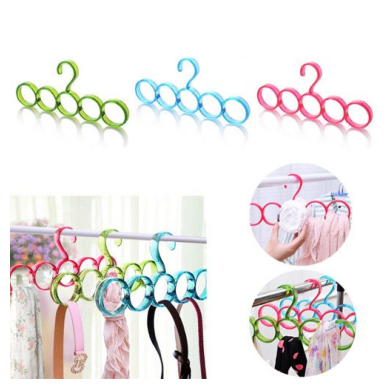

Product type code: 1920
Product type label: "linge de maison"
Designation: Imprimer Taie Polyester Canapé Coussin Car Cover Home Decor
Description: Imprimer Taie polyester Canapé Coussin Car Cover Home Decor Feature: protection de l&#39;environnement non toxique Taille: 45x45cm Matériel: Polyester caché Fermeture à glissière Condition: main tout neuf jamais utilisé sans soins Tag: Lavable à la main ou lavage à l&#39;eau froide au cycle délicat. Ne pas utiliser l&#39;eau de Javel. La taille mesurée manuellement. La tolérance est de 1 cm. Nous faisons de notre mieux le spectacle produit réel. mais s&#39;il vous plaît comprendre la couleur encore peut-être un peu différent selon l&#39;effet illustration et de l&#39;écran. Contenu de l&#39;emballage: 1pc Taie Sans oreiller
Image dimensions: 500x500 pixels


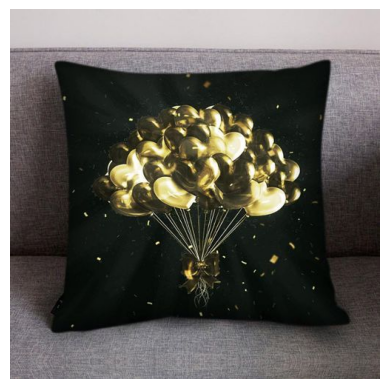

Product type code: 1940
Product type label: "nourriture"
Designation: Crackers 5 Cereales 310gr
Description: <p>Tout le goût de Mulino Bianco goût dans des biscuits préparés avec des ingrédients simples.</p> <p>Crackers aux céréales avec orge soufflé sésame grillé et levure mère.</p> <p>Origine : Piémont (Vercelli)</p> <p>Ingrédients : Farine de froment 76% farine de céréales 13% (avoine orge riz seigle) huile de soja orge soufflé 4% gluten de froment sel extrait de malt d orge et maïs levure mère 1% (farine de froment eau farine d orge malté levure) farine d orge malté correcteur d acidité: carbonate acide de sodium levure. Peut contenir des traces d arachides de fruits à coquille lait et oeufs. Les ingrédients mis en évidence peuvent provoquer des réactions chez les personnes allergiques ou intolérantes.</p> <p>Poids net : 310gr</p> <p>Conseils de dégustation: A déguster à tout moment de la journée goûter apéritif.</p> <p> <br /></p>
Image dimensions: 500x500 pixels


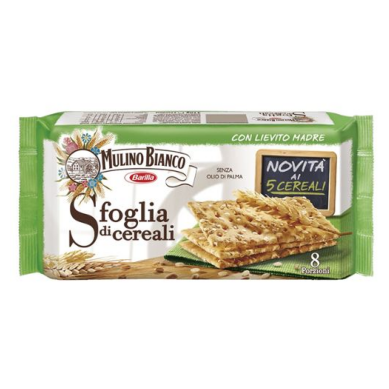

Product type code: 2060
Product type label: "accesoires de décoration pour maison"
Designation: Lumières Lettre Led 30cmx4.5cm Decor Panneau Signalisation Métal Batterie Décorative D
Description: Caractéristiques: <br />Nom du produit: Lumière de lettre de LED <br />Matériel: Plastique <br />Couleur blanche <br />Hauteur: Approx. 30cm / 11.8 &#34; <br />Profondeur: Approx. 4.5cm /1.77 &#34; <br />Batterie: 2x piles AA (Non inclus) <br /> <br />Le forfait comprend: <br />1x LED Lettre Lumière <br /> <br />Fonctionnalité: <br />-100% nouveau et de haute qualité. <br />-Fashion LED sous-titres lampe peut être composé de polices populaires obtenir le meilleur effet décoratif. <br />-Convient pour la maison fête d&#39;anniversaire en plein air les bars les cafés décorés les décorations de Noël célèbrent. <br />Longue durée de vie de la lampe LED l&#39;utilisation à long terme n&#39;est pas chaude.
Image dimensions: 500x500 pixels


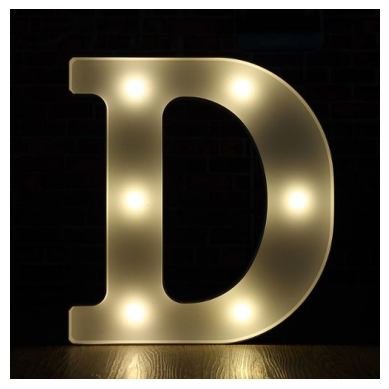

Product type code: 2220
Product type label: "accessoires pour animaux de compagnie"
Designation: Harnais Chien Réglable Gilet Chien Avec Poignée Harnais Avec Laisse En Tissu De Maille Magideal
Description: <p><b>La description:</b></p><br /><p> Tissu neuf et de haute qualité à la mode beau design mignon et charmant. </p><p> Gilet fabriqué à partir d&#39;une maille douce et respirante. </p><p> Harnais d&#39;entraînement de sécurité ajustable pour la marche de votre animal de compagnie. </p><p> Se sent très doux lisse confortable épais et chaud. </p><p> Ils sont respirants pour garder votre animal de compagnie à l&#39;aise tout au long de leur promenade. </p><br /><p><b>spécification:</b></p><br /><p> Matériel: Tissu de maille </p><p> Taille de la corde de traction (LxW): Approx. 110x1.5cm / 43.31x0.59inch </p><br /><p><b>Tableau des tailles:</b></p><br /><p> <b>S:</b> </p><p> Circonférence thoracique: Approx. 29-36cm / 11.42-14.17inch </p><p> Circonférence du cou: Approx. 24cm / 9.45inc

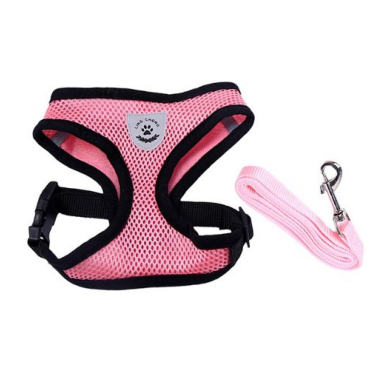

Product type code: 2280
Product type label: "magazines"
Designation: Photo Aventures N°3 - 11e Année : Roches Rouges Avec George Montgomery Philip Ellen Drew Et Addison Richads
Description: nan
Image dimensions: 500x500 pixels


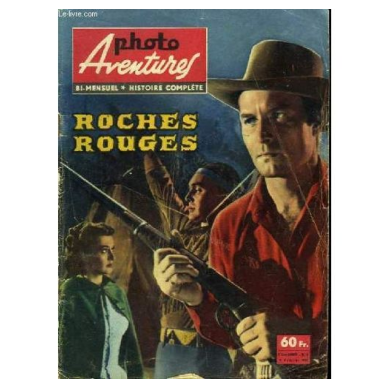

Product type code: 2403
Product type label: "livres et bds"
Designation: Revue Vélonews Année 2001
Description: nan
Image dimensions: 500x500 pixels


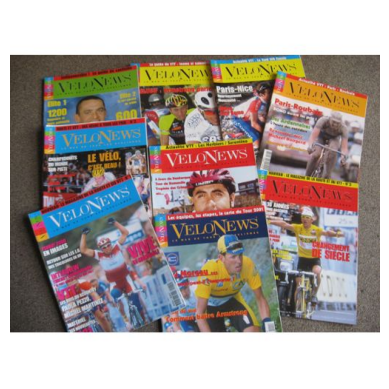

Product type code: 2462
Product type label: "consoles de jeux vidéo et jeux vidéos d'occasion"
Designation: Little Nightmares - Ps4 - Playstation 4 - Edition Promo
Description: nan
Image dimensions: 500x500 pixels


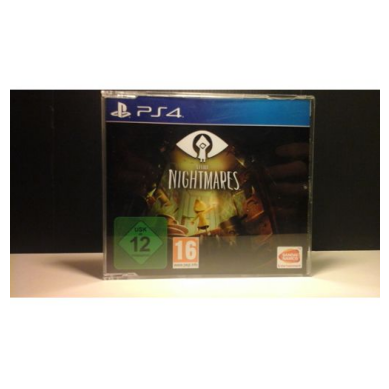

Product type code: 2522
Product type label: "produits de papeterie et rangement bureau"
Designation: Pilot Stylo À Bille Rétractable Super Grip Encre De Couleur
Description: Constructeur: PILOT. Référence: 154904. Vendeur pro - produit neuf et garanti - livraison rapide et soignée par colissimo recommandé - délai de livraison entre 4 et 5 jours ouvrés
Image dimensions: 500x500 pixels


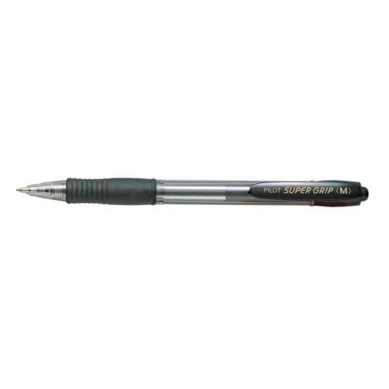

Product type code: 2582
Product type label: "mobilier d'extérieur et accessoires"
Designation: Salon De Jardin En Résine Tressée Bora Bora Noir - Hespéride
Description: Salon Bora Bora de la marque Hespéride composé de 4 pièces en résine synthétique tressée. Lieu de repos et de détente ce salon de jardin Bora Bora en résine tressé est confortable et accueillant. Son design sobre et naturel grâce à la résine tressé lui permet de s&#39;intégrer dans tous les intérieurs/extérieurs et d&#39;offrir une ambiance chaleureuse. Ce salon comprend : 1 canapé 2 places 2 fauteuils avec accoudoirs et 1 table basse avec plateau en verre trempé. Pour une grande durabilité le salon de jardin Bora Bora est conçu avec une structure en acier époxy capable de résister aux intempéries et à la rouille. L&#39;habillage en résine tressé synthétique offre confort et esthétisme. La résine tressée est une matière très résistante qui ne décolore pas au soleil et qui s&#39;entretient très facilement. Pour l&#39;ent

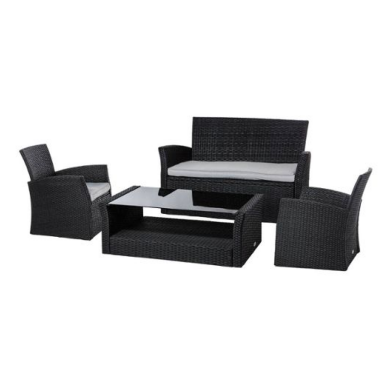

Product type code: 2583
Product type label: "accessoires de piscine"
Designation: Kit piscine acier aspect rotin Gré Rattan ovale 634 x 399 x 132 m + Bâche hiver
Description: Piscine hors-sol ovale en acier aspect rotin Rattan de la marque Gré.La piscine en acier ovale Rattan c&#39;est :? Une structure en acier galvanisé d&#39;une épaisseur de 45/100 à l&#39;aspect rotin. Renforcée par des poteaux de 12 cm de large ainsi que par plusieurs jambes de force (le nombre de jambes de force varie selon la taille de la piscine).? Un liner de couleur bleu en pvc d&#39;une épaisseur de 40/100. Il se fixe à la structure avec un system Overlap.Elle dispose d&#39;un équipement complet : ? Filtration à sable de 5 m³/h avec sable fournis.? ¿Échelle de sécurité avec marche amovible.? Skimmer.?Tapis de sol.Plusieurs tailles de piscines en acier sont disponibles : KITPROV508FRT : Piscine acier Rattan 527 x 327 m? Dimensions extérieures (L x l x H) : 527 x 327 x 132 m? Dimensions intérieures (L x l) : 50

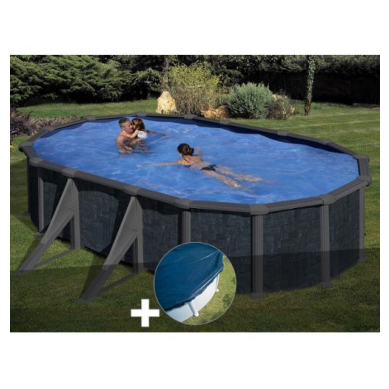

Product type code: 2585
Product type label: "outillage et accessoires pour travaux ou jardinage"
Designation: Hozelock Arroseur rectangulaire 230 m²
Description: Ce 2 en 1 arroseur oscillant réglable jaune est adapté pour arroser les pelouses et les haies. Il vous permet de contrôler un débit d?eau précis tout en l'utilisant. L'arroseur avec un moteur haute performance dispose de 16 types de jets pour l'arrosage des pelouses et 5 types de jets de brumisation pour l?arrosage des semis. Sa couverture arrosée peut aller jusqu'à 230 m². Cet arroseur est idéal pour l'arrosage de vos plantes de jardin nettoyer les voitures et etc.! L?achetez tout de suite et votre travail au jardin devient plus facile.|<li><li>Couleur: jaune</li><li>Matériau: plastique <br /></li><li>Surface maximale: 230 m² </li><li>Dimensions: 115 x 155 x 485 cm </li><li>16 types de jets pour l'arrosage des pelouses et 5 types de jets de brumisation pour l?arrosage des semis </li><br /></li>
Image dimensions: 500x500 pixel

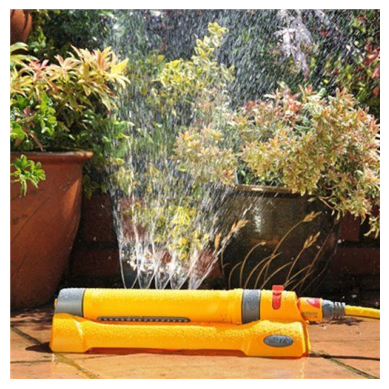

Product type code: 2705
Product type label: "livres"
Designation: Ma Guerre De Cent Ans
Description: ««Un jour mon grand-père est mort. D'un coup. D'un coup de feu de guerre. Mort assis contre un arbre. C'était l'été.» Il n'eut pas le temps de devenir un «poilu» d'avoir barbe et poux. En le tuant on a aussi tué son enfance dont nul ne sait plus rien cent ans plus tard. Je sais encore la mienne dans la guerre suivante. Je sais encore mon adolescence et les avions de guerre froide. Je sais comment les griffes de la guerre d'Algérie m'ont épargné. Je sais aussi que toute enfance gommée m'a mené aux enfances vives de Bosnie du Liban ou à ma porte. Mon fusil à moi tire sur elles dans des livres dont les éclats ne sont que rires ou tendresse au chevet de la vie. Ainsi je cours le monde en lui offrant le mien écrit ou dessiné. Ne croyez pas que je sois centenaire mais il est des morts qui vous font vivre vieux.» Pef
Image dimensions: 500x500 pixels


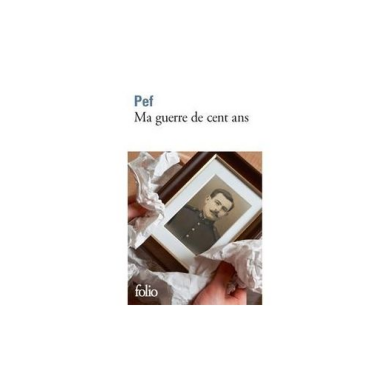

Product type code: 2905
Product type label: "jeux en téléchargement"
Designation: Lego Mon Univers Maternelle 2 - Jeu En Téléchargement
Description: <b>Plate-forme :</b> PC<br /> <b>Etat du jeu :</b> Disponible<br /> <b>Date de sortie française :</b> 2000<br /> <b>Genre :</b> Ludo éducatif<br /> <b>Appartient au groupe :</b> LEGO<br /> <b>Développeur :</b> Data Design<br /> <b>Editeur :</b> Lego Media<br /><br /> LEGO Mon univers Maternelle 2<br /> Découvrez une méthode d&#39;enseignement adaptée aux besoins particuliers de votre enfant fondée sur des techniques d&#39;apprentissage créatives.<br /> S&#39;inspirant de LEGO Maternelle 2 offre un environnement idéal pour découvrir les chiffres les lettres la musique et le dessin.<br /><br /> <b><u>Votre enfant va pouvoir apprendre :</u></b><br /><br />  <ul><li>Reconnaissance des lettres</li><li>Calcul et nombre</li><li>Correspondance et tri</li><li>Suite de nombres et de lettres</li><li>Reconnaissance des formes et des couleurs</li><li>M

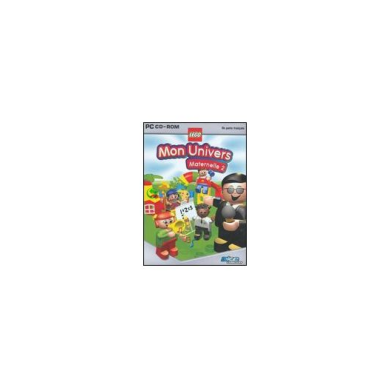

In [26]:
# Random selection of one index in y_train for each type of product code
random_indices = y_train.groupby('prdtypecode').apply(lambda x: x.sample(1)).index.get_level_values(1).tolist()

# Display the image for the randomly selected indices
for idx in random_indices:
    print(f"Product type code: {y_train.loc[idx, 'prdtypecode']}")
    print(f"Product type label: \"{y_train.loc[idx, 'prdtypecode_label']}\"")
    print(f"Designation: {X_train.loc[idx, 'designation']}")
    print(f"Description: {X_train.loc[idx, 'description']}")

    display_image_from_row(idx, "train", is_index=True, print_dim=True)

# extract the selected image paths in a csv
selected_image_paths = X_train.loc[random_indices].apply(
    lambda row: image_path(row["imageid"], row["productid"], "train"), axis=1
).tolist()
selected_image_paths_df = pd.DataFrame(selected_image_paths, columns=["imagepath"])
selected_image_paths_df.to_csv("selected_image_paths.csv", index=False)

# extract the selected indices y_train and X_train into csv files
selected_y_train = y_train.loc[random_indices]
selected_X_train = X_train.loc[random_indices]
selected_y_train.to_csv("selected_y_train.csv", index=False)
selected_X_train.to_csv("selected_X_train.csv", index=False)


### Vérification du format

Associons à chaque produit le path de l'image qui lui correspond.

In [27]:
X_train["imagepath"] = X_train.apply(lambda row: image_path(row["imageid"], row["productid"], "train"), axis=1)
X_test["imagepath"] = X_test.apply(lambda row: image_path(row["imageid"], row["productid"], "test"), axis=1)

Le dataset train contient autant que d'images que de produits (84916). On pose alors l'hypothèse très probable que chaque produit a bien une image associée, même si elle est vide (entièrement blanche, ce qu'on testera plus tard), ce qui correspondrait à une valeur nulle.

Les chargements ou traitements d'image étant assez lourds, nous décidons de prendre seulement un échantillon de 1000 images aléatoires (mais reproductible) pour notre première analyse, et nous gardons les produits associées en textuel de côté.

In [28]:
X_train_sample = X_train.sample(n=1000, random_state=42)

X_img_sample = X_train_sample["imagepath"]
X_img_sample.head()

36138    /home/cramarokoto/jul25_bootcamp_ds_classifica...
68630    /home/cramarokoto/jul25_bootcamp_ds_classifica...
36172    /home/cramarokoto/jul25_bootcamp_ds_classifica...
9830     /home/cramarokoto/jul25_bootcamp_ds_classifica...
28422    /home/cramarokoto/jul25_bootcamp_ds_classifica...
Name: imagepath, dtype: object

On l'enrichit avec d'autres informations.

In [29]:
def shape_from_path(image_path):
    img = mpimg.imread(image_path)
    return img.shape

In [30]:
X_img_sample = pd.concat([
    X_img_sample.rename("image_path"),
    X_img_sample.apply(shape_from_path).rename("image_shape")
], axis=1)

In [31]:
data_info(X_img_sample)

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 36138 to 65534
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_path   1000 non-null   object
 1   image_shape  1000 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB




image_path    image_shape
36138  /home/cramarokoto/jul25_bootcamp_ds_classifica...  (500, 500, 3)
68630  /home/cramarokoto/jul25_bootcamp_ds_classifica...  (500, 500, 3)
36172  /home/cramarokoto/jul25_bootcamp_ds_classifica...  (500, 500, 3)
9830   /home/cramarokoto/jul25_bootcamp_ds_classifica...  (500, 500, 3)
28422  /home/cramarokoto/jul25_bootcamp_ds_classifica...  (500, 500, 3)

Vérifions que dans le dataset (au moins dans l'échantillon), toutes les images sont au même format.

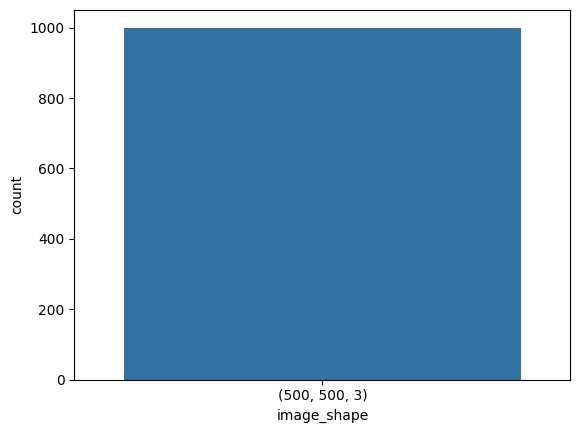

In [32]:
# Compter les occurrences des formats
X_img_sample['image_shape'] = X_img_sample['image_shape'].astype(str)
sns.countplot(data=X_img_sample, x='image_shape', order=X_img_sample['image_shape'].value_counts().index)
plt.show()

On a bien uniquement des images en 500x500 pixels et en RGB.

### Content Box: la zone utile sans les bords blancs

Déterminons maintenant la "zone utile", c'est-à-dire l'image sans les bords blancs.

In [33]:
def get_content_box(image_path, seuil_ratio=0.99):
    """
    Détecte la bounding box du contenu non blanc d'une image.

    Args:
        image_path (str): chemin vers l'image.
        seuil (float): seuil pour considérer un pixel blanc (entre 0 et 1).
    Returns:
        tuple: dimensions de la zone utile (largeur, hauteur), coordonnées x_min, y_min, x_max, y_max.
    """
     
    # Charge l'image (forme: H x W x C), valeurs normalisées [0, 1]
    img = mpimg.imread(image_path)

    # img peut être chargé normalisé (valeurs de couleurs entre 0 et 1) ou en [0, 255]
    # On adapte donc le seuil en fonction de la valeur maximale des pixels
    seuil = seuil_ratio * img.max()

    # Crée un masque des pixels "non blancs"
    # Ici, on considère qu'un pixel est blanc si ses 3 canaux sont > seuil (proche de 1)
    non_white = np.any(img < seuil, axis=2)
   
    # Trouve les coordonnées de la zone utile
    coords = np.argwhere(non_white)

    if coords.size == 0:
        # "Image entièrement blanche."
        return None

    # Récupère les limites du contenu utile
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0)

    width = x_max - x_min + 1
    height = y_max - y_min + 1

    # print(f"Taille utile : {width} x {height} pixels")
    # print(f"Bounding box : x={x_min}, y={y_min}, largeur={width}, hauteur={height}")

    return ((width, height), x_min, y_min, x_max, y_max)

Image dimensions: 500x500 pixels


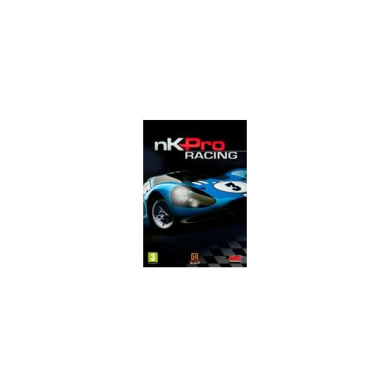

(np.int64(146), np.int64(209)) 175 144 320 352


In [34]:
# Exemple d’utilisation
display_image(X_img_sample.iloc[0]["image_path"], print_dim=True)
dim, x_min, y_min, x_max, y_max = get_content_box(image_path=X_img_sample.iloc[0]["image_path"])
print(dim, x_min, y_min, x_max, y_max)

In [35]:
# Charge l'image complète et retourne l'image utile à partir de la bounding box
def load_content_from_box(image_path, x_min, y_min, x_max, y_max):
    # Charge l'image complète
    img = mpimg.imread(image_path)

    # Attention : dans numpy, l'ordre est img[hauteur, largeur] donc img[y_min:y_max+1, x_min:x_max+1]
    img_cropped = img[y_min:y_max+1, x_min:x_max+1, :]
    return img_cropped


def load_content_box_from_image(image_path):
    """
    Charge l'image complète et retourne l'image utile.
    
    Args:
        image_path (str): chemin vers l'image.
    
    Returns:
        np.ndarray: image utile sans les bords blancs.
    """
    dim, x_min, y_min, x_max, y_max = get_content_box(image_path)
    if dim is None:
        return None  # Image entièrement blanche
    
    return load_content_from_box(image_path, x_min, y_min, x_max, y_max)

Image dimensions: 209x146 pixels


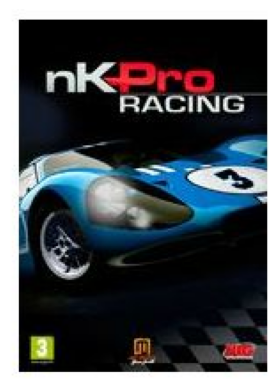

In [36]:
# Exemple d'utilisation
display_image(load_content_box_from_image(X_img_sample.iloc[0]["image_path"]), print_dim=True)

Remplissons notre Dataframe d'échantillon d'images avec ces informations.

In [37]:
df_content_box = X_img_sample["image_path"].apply(get_content_box).apply(pd.Series)
df_content_box.columns = ["content_dim", "x_min", "y_min", "x_max", "y_max"]

X_img_sample["content_dim"] = df_content_box["content_dim"]
X_img_sample[["content_width", "content_height"]] = X_img_sample["content_dim"].apply(pd.Series)
X_img_sample[["x_min", "y_min", "x_max", "y_max"]] = df_content_box[["x_min", "y_min", "x_max", "y_max"]]

In [38]:
data_info(X_img_sample)

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 36138 to 65534
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_path      1000 non-null   object
 1   image_shape     1000 non-null   object
 2   content_dim     1000 non-null   object
 3   content_width   1000 non-null   int64 
 4   content_height  1000 non-null   int64 
 5   x_min           1000 non-null   int64 
 6   y_min           1000 non-null   int64 
 7   x_max           1000 non-null   int64 
 8   y_max           1000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 78.1+ KB




image_path    image_shape  \
36138  /home/cramarokoto/jul25_bootcamp_ds_classifica...  (500, 500, 3)   
68630  /home/cramarokoto/jul25_bootcamp_ds_classifica...  (500, 500, 3)   
36172  /home/cramarokoto/jul25_bootcamp_ds_classifica...  (500, 500, 3)   
9830   /home/cramarokoto/jul25_bootcamp_ds_classifica...  (500, 500, 3)   
28422  /home/cramarokoto/jul25_bootcamp_ds_classifica...  (500, 500, 3)   

      content_dim  content_width  content_height  x_min  y_min  x_max  y_max  
36138  (146, 209)            146             209    175    144    320    352  
68630  (194, 209)            194             209    175    144    368    352  
36172  (500, 500)            500             500      0      0    499    499  
9830   (395, 500)            395             500     53      0    447    499  
28422  (368, 500)            368             500     64      0    431    499

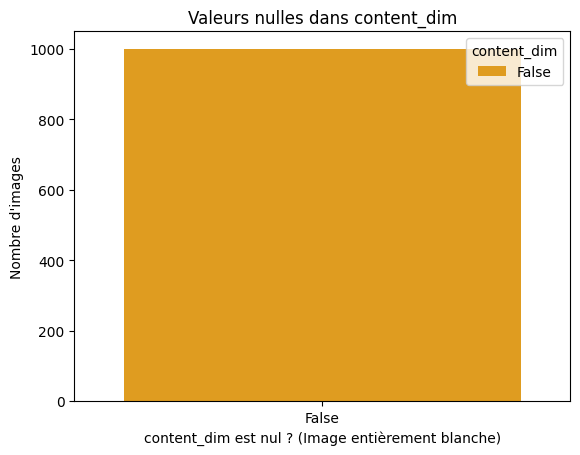

In [39]:
content_dim_value_counts = X_img_sample["content_dim"].isnull().value_counts()
sns.barplot(
    x=content_dim_value_counts.index,
    hue=content_dim_value_counts.index,
    y=content_dim_value_counts.values,
    palette={True: "blue", False: "orange"}
)
plt.title("Valeurs nulles dans content_dim")
plt.xlabel("content_dim est nul ? (Image entièrement blanche)")
plt.ylabel("Nombre d'images")
plt.show()

Quand une image est entièrement blanche, alors le content_dim est nul. Ce n'est pas le cas ici alors aucune de nos images (donc des images liées aux produits) n'est "nulle".

Il ne s'agit que d'un échantillon, même s'il a été choisi aléatoirement, cela ne nous donne pas la proportion totale, mais cela nous sert simplement d'idée. On supposera ainsi qu'aucune image n'est entièrement blanche.

### Uniformité des données d'image et préparation

On s'intéresse aux dimensions de la content box.

False    525
True     475
Name: count, dtype: int64


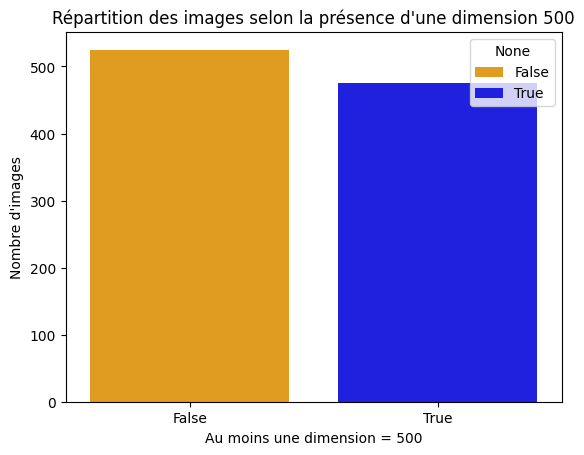

In [40]:
# On considère qu'une image est "complète" si au moins une de ses dimensions (largeur ou hauteur) est égale à 500 pixels.
# Création d'une colonne booléenne "image_complete" : True si width ou height = 500
image_complete = (X_img_sample['content_width'] == 500) | (X_img_sample['content_height'] == 500)
print(image_complete.value_counts())
# Countplot
sns.countplot(x=image_complete, hue=image_complete, palette={True: "blue", False: "orange"})

plt.xlabel("Au moins une dimension = 500")
plt.ylabel("Nombre d'images")
plt.title("Répartition des images selon la présence d'une dimension 500")
plt.show()

On constate que 52,5% n'a aucune de ses dimensions égale à 500. Beaucoup d'images n'occupent donc pas l'espace disponible, dans aucune des dimensions: nous pourrions donc les étendre.

En effet, la zone utile (qui serait également la zone utile pour l'apprentissage par un modèle) est bien différente selon les images.
Nous pourrions alors nous intéresser à appliquer des algorithmes de Computer Vision pour combler cette différence et harmoniser les données et les vecteurs qui en résulteraient.
L'exemple le plus simple serait d'utiliser un filtre avec des masques pour agrandir les images jusqu'à atteindre un des bords.

Il serait plus difficile pour un modèle s'entraînant sur des images d'être pertinent si certaines données sont des matrices creuses (pleine de blanc) et d'autres sont pleines.

Par exemple, deux piscines prenant toute l'image auraient plus d'informations communes dans leurs pixels qu'une piscine en grand, et une piscine en toute petite (majorité de pixels blancs).

Nous aurions pu également visualiser l'ensemble des différents format de Content box mais cela serait bien trop éparpillé et le traitement final serait identique. 

Pour autant, cela est réalisable avec un **heatmap** de **luminance** (intensité des nuances de gris) qui pourra nous donner une idée de la répartition des pixels, et donc des dimensions.

Une étude intéressante peut également être la "forme" des images, c'est-à-dire grossièrement le rapport longueur/largeur des images.

### Répartition des dimensions

Comme évoqué précédemment, nous pouvons avoir un aperçu de la répartition des dimensions à travers deux indices:
- une heatmap de la luminance,
- la distribution du rapport longueur/largeur.


#### Luminance

Pour effectuer une heatmap de la luminance et ainsi avoir une idée de la répartition des dimensions des images, il nous faut d'abord transformer nos images en nuances de gris. Nous passons alors de 3 canaux par pixel à un seul canal.

Exemple:

Image dimensions: 500x500 pixels


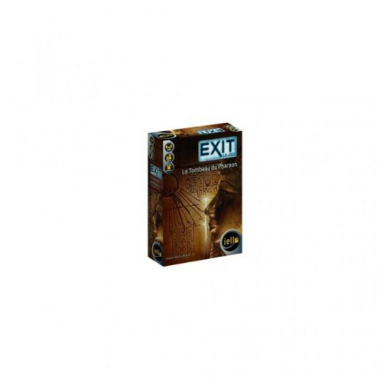

In [41]:
display_image(X_img_sample.iloc[1]["image_path"], print_dim=True)

In [42]:
def to_grayscale(img_path):
    img = Image.open(img_path).convert("L")
    # Passage en float32 pour diviser par 2 la mémoire sans perte notable de précision
    img_gray = np.asarray(img, dtype=np.float32) / 255.0  # Normalisation entre 0 et 1
    return img_gray

Image dimensions: 500x500 pixels


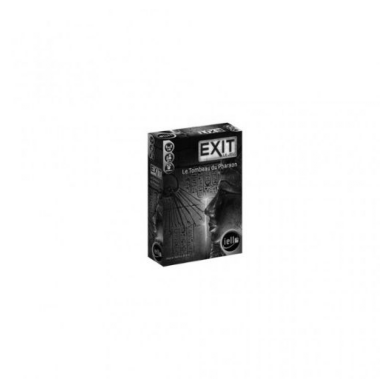

In [43]:
display_image(to_grayscale(X_img_sample.iloc[1]["image_path"]), print_dim=True, cmap="gray")

Réunissons maintenant toutes les images et leurs nuances de gris pour former la heatmap.

In [44]:
# On stock chaque image en niveaux de gris (chacune étant un tableau (W, H)) dans une liste
gray_images = []
for path in X_img_sample["image_path"]:
    img = to_grayscale(path)
    gray_images.append(img)

# On stack les images en un tableau 3D (N, W, H) où N est le nombre d'images
gray_images_array = np.stack(gray_images, axis=0)

# On calcule la moyenne pixel par pixel sur l'axe des images (N)
heatmap_mean = gray_images_array.mean(axis=0)

Affichons maintenant la heatmap !

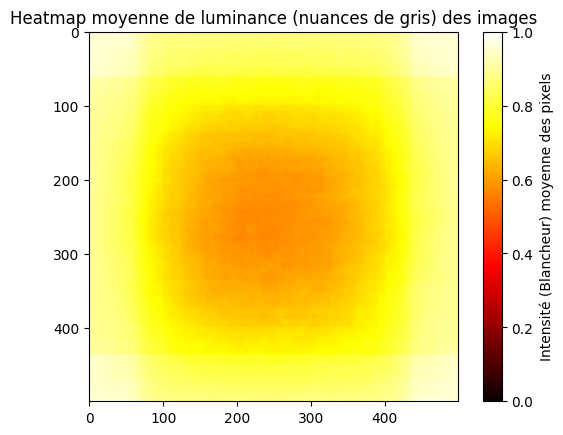

In [45]:
plt.imshow(heatmap_mean, cmap='hot', vmin=0, vmax=1) # Les valeurs vont de 0 (noir) à 1 (blanc)
plt.colorbar(label="Intensité (Blancheur) moyenne des pixels")
plt.title("Heatmap moyenne de luminance (nuances de gris) des images")
plt.show()

Nous voyons déjà bien la répartition des pixels "blancs" rassemblés sur les extérieurs tandis que plus de contenu (ombres/contrastes/couleurs moins blanches) se réunissent plus au centre de l'image.
Les coins prennent bien plus de valeurs blanches.

Nous pouvons également constater que le contraste est assez léger et les moyennes semblent osciller seulement sur la moitié des valeurs possibles. Avant d'analyser un peu plus la heatmap, nous allons donc nous centrer sur les valeurs prises pour observer au mieux les contrastes observables.

Pour cela, prenons quelques données sur les intensités moyennes et centrons la heatmap autour de ces valeurs.

In [46]:
heatmap_mean.mean(), heatmap_mean.min(), heatmap_mean.max()

(np.float32(0.76732415), np.float32(0.5601018), np.float32(0.9608037))

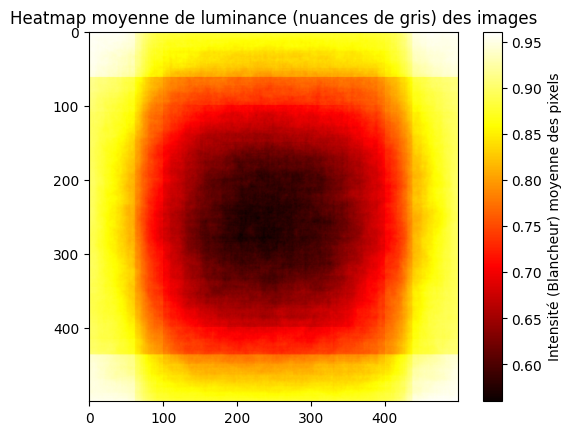

In [47]:
plt.imshow(heatmap_mean, cmap='hot') # Les valeurs vont de 0.56 (noir), 0.96 (blanc)
plt.colorbar(label="Intensité (Blancheur) moyenne des pixels")
plt.title("Heatmap moyenne de luminance (nuances de gris) des images")
plt.show()

En effet, nous observons plus distinctement des propriétés:
- une tâche noire est clairement identifiable au milieu (intensité moyenne plus sombre),
- un vrai carré orange se forme entre (75, 75), (425,75), (425, 425) et (75, 425),
- les côtés jaunes indiquent une grande éclaircie moyenne, des bords non-exploités,
- les coins sont quasiment blancs.

On en conclut que :
- un bon nombre d'images ne sont pas à la bonne dimension mais sont centrées,
- un nombre non-négligeable d'images prennent la totalité de l'espace possible mais sont plus larges que longues (bords jaunes gauche et droite), ou plus longues que larges (bords jaunes haut et bas) car ils laissent notamment les coins blancs.

On s'intéresse donc maintenant à cette différence largeur/hauteur. Pour cela, nous allons étudier la distribution du ratio largeur/hauteur.

#### Distribution du ratio largeur/hauteur

Pour étudier ce ratio, nous avons besoin de la vraie longueur et de la vraie largeur des images, c'est-à-dire sans les bords ou toute mesure vide.

Nous considérons alors le plus petit rectangle dans laquelle nous pouvons placer notre image, c'est-à-dire dans lequel il y a tous les pixels plein (non-blancs) et avec le moins de pixels blancs possible. Cela tombe bien, c'est ce qui s'appelle la Content Box, que nous avons déjà mis en place précédemment !

In [48]:
# Rappel:
print(list(X_img_sample.columns))

# On stoque déjà la largeur et la hauteur du contenu utile dans X_img_sample
# en tant que content_width et content_height

# Calcul du ratio largeur/hauteur qu'on rajoute au sample
X_img_sample["content_ratio"] = np.round(X_img_sample["content_width"] / X_img_sample["content_height"], 4)

['image_path', 'image_shape', 'content_dim', 'content_width', 'content_height', 'x_min', 'y_min', 'x_max', 'y_max']


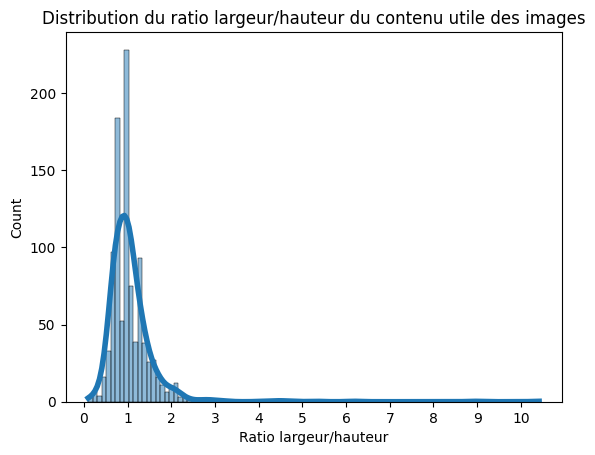

In [49]:
sns.histplot(data=X_img_sample, x="content_ratio", bins=100, kde=True, line_kws={"color" : "red", "linewidth": 4})
plt.title("Distribution du ratio largeur/hauteur du contenu utile des images")
plt.xlabel("Ratio largeur/hauteur")
plt.xticks(np.linspace(0, 10, 11))
plt.show()

Nous observons une distribution plutôt symétrique entre 0 et 2 qui semble centrée en 1. Cependant, un certain nombre de valeurs extrêmes montent jusqu'à 11 ce qui enlève la symétrie. Elles se font toutefois de plus en plus rare à hauteur qu'elles s'éloignent de 1.

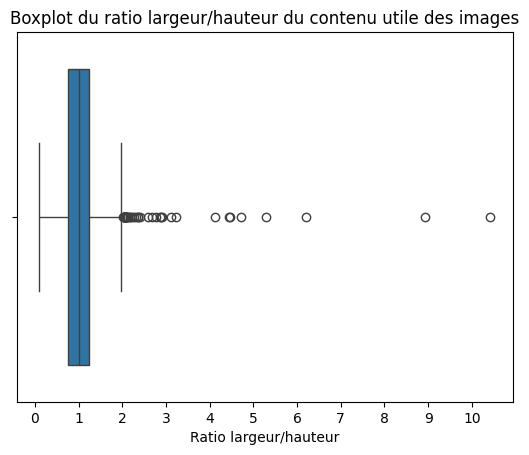

In [50]:
sns.boxplot(data=X_img_sample, x="content_ratio")
plt.title("Boxplot du ratio largeur/hauteur du contenu utile des images")
plt.xlabel("Ratio largeur/hauteur")
plt.xticks(np.linspace(0, 10, 11))
plt.show()

On observe cette fois-ci que la médiane est d'environ un, que les quartiles semblent être symétrique à 1, aux alentours de 0.7 et 1.3, et enfin on remarque que les whiskers (moustaches) forment également presque une symétrie autour de 1; à 0 et à 2 environ.

Voici de manière chiffrée la moyenne, la variance et l'écart-type de ce ratio.

In [51]:
X_img_sample["content_ratio"].mean(), np.sqrt(X_img_sample["content_ratio"].std()), X_img_sample["content_ratio"].std()


(np.float64(1.0803857000000001),
 np.float64(0.7921481644481851),
 np.float64(0.627498714438629))

Nous aurions pu penser à une distribution de type loi normale, mais les longues valeurs extrêmes sur la droite nous en éloignent un peu. Un loi lognormale de petit écart-type est envisageable.

Outre nommer spécifiquement une loi proche de notre distribution, rappelons-nous que les valeurs du ratio largeur/hauteur tendant vers + infini représentent le fait de tendre vers 0 pour le ratio hauteur/largeur, et inversement.

On peut ainsi conclure qu'en moyenne, les images sont aussi longues que larges et qu'il n'y a pas une différence significative entre le nombre d'images essentiellement sur la largeur et le nombre d'images essentiellement sur la hauteur, d'après les boxplots.

#### Conclusion des dimensions

Les images sont centrées, les rebords sont globalement bien plus blancs car les images ne prennent pas la totalité de l'espace, et les coins sont les moins représentés car ils sont laissés de côté à la fois par les images plus petites, mais aussi par les images dont les dimensions sont asymétriques.

Les images de dimensions asymétriques sont plutôt équitablement réparties entre les images plus longues que larges et les images plus larges que longues.

# Récapitulatif de l'analyse exploratoire des données initiales

|        | Nombre lignes dans la table : ? | 84916                                                                                                             | Pour le dataset utilisable                                                                                                                       |                                                                                                                      |            |                                                                                                                                                                                                                                           |                                                                                                                                                                                                      |                                                                                  |
|--------|---------------------------------|-------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------|------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------|
| N° Col | Nom de la colonne               | Description                                                                                                       | Disponibilité de la variable a priori                                                                                                            | Type informatique                                                                                                    | Taux de NA | Gestion des NA                                                                                                                                                                                                                            | Distribution des valeurs                                                                                                                                                                             | Remarques sur la colonne                                                         |
|        |                                 | Que représente cette variable en quelques mots ?                                                                  | Pouvez vous connaitre ce champ en amont d'une prédiction ? Aurez vous accès à cette variable en environnement de production ?                    | int64, float etc...  Si "object", détaillez.                                                                         | en %       | Quelle mode de (non) - gestion des NA favorisez vous ?                                                                                                                                                                                    | Pour les variables catégorielles comportant moins de 10 catégories, énumérez toutes les catégories.  Pour les variables quantitatives, détaillez la distribution (statistiques descriptives de base) | champs libre à renseigner                                                        |
| 1      | Désignation                     | L’appelation du produit : comme une petite description qui donne l’essentiel sur le produit et donc sa catégorie. | Cette donnée est la base textuelle et est toujours accessible pour la prédiction même en environnement de production.                            | «object » qui est clairement une chaîne de caractères. Certains symboles doivent être changés pour la compréhension. | 0,00 %     | /                                                                                                                                                                                                                                         | C’est un string qui n’est ni quantitatif ni catégoriel. C’est une variable descriptive.                                                                                                              | Les valeurs d’un tel string sont très vastes et une analyse NLP sera nécessaire. |
| 2      | Description                     | Description plus détaillé du produit, de son état, de son utilisation. Regorge d’informations et de mots clés.    | Cette donnée est accessible pour la prédiction même en environnement de production, seulement quand elle n’est pas n/a (nombreuses occurrences). | «object » qui est clairement une chaîne de caractères. Certains symboles doivent être changés pour la compréhension. | 35.09%     | Il s’agit d’une description textuelle : on ne peut la générer pertinemment ni effectuer un remplissage statistique. Soit on l’utilise seulement lorsqu’elle est présente ; soit on fait un remplissage par IA à partir de la désignation. | Identique à la désignation à l’exception des nombreux N/A.                                                                                                                                           | Identique à la désignation.                                                      |
| 3      | productid                       | L’index du produit                                                                                                | N’aura pas de valeur pour être entraîné autre que pour relier le produit (textuel) à son image                                                   | int64                                                                                                                | 0,00 %     | /                                                                                                                                                                                                                                         | /                                                                                                                                                                                                    | /                                                                                |
| 4      | imageid                         | L’index de l’image                                                                                                | N’aura pas de valeur pour être entraîné autre que pour relier le produit (textuel) à son image                                                   | int64                                                                                                                | 0,00 %     | /                                                                                                                                                                                                                                         | /                                                                                                                                                                                                    | /                                                                                |
| 5      | imagepath                       | Le path de l’image pour l’associer au produit                                                                     | Utile en prod pour entraîner sur l’image tout en ayant la bonne évaluation de la classe                                                          | string                                                                                                               | 0.00%      | /                                                                                                                                                                                                                                         | /                                                                                                                                                                                                    | /                                                                                |

# Stratégie MLFlow proposée

## Préparation des données
- Diviser **X_train** et **y_train** en ensembles d'entraînement et de test avec la même répartition.  
- Décider si les descriptions nulles doivent être remplacées par des descriptions générées (ex. à partir de la désignation ou de mots-clés).

## Modélisation texte
- Construire un modèle de classification des produits basé sur le texte.  
- Intégrer des traitements NLP sur la désignation et la description.

## Modélisation images
- Appliquer des techniques de Computer Vision pour harmoniser le dataset d'images.  
- Transformer les images en vecteurs de pixels associés aux produits.  
- Construire un modèle de classification des produits à partir des images.

## Évaluation et amélioration
- Évaluer les performances des modèles texte et image.  
- Ajuster et optimiser ces modèles pour améliorer les performances.

## Fusion des modèles
- Définir des pondérations pour les modèles en fonction de leurs performances respectives.  
- Créer une fonction pour calculer une moyenne pondérée des probabilités des classes (comme en Bagging).  
- Évaluer la classification finale basée sur cette moyenne pondérée pendant la phase de test.  
- Optimiser les pondérations pour améliorer les résultats.

## Conclusion
- Comparer les performances du modèle combiné avec celles des meilleurs modèles individuels.  
- Conclure sur la solution la plus efficace entre modèle seul et combinaison.